<a href="https://colab.research.google.com/github/JSEFERINO/Dise-o_de_Experimentos_DOE/blob/main/Diseno_de_experimentos_ACTIVIDAD_4_CORREO_%5BMARIA_MEDINA%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 2: PHYTON DCL Y R [PROBLEMA 3.4] [NIVEL DE INTENSIDAD]
### Solución propuesta por: **Maria Fernanda Medina Reyes**
### Docente: **Julio Hurtado**


## **Enunciado**

Un ingeniero está estudiando métodos para medir la capacidad de detección de ciertos radares de alcance. Los dos factores que se consideran importantes son la cantidad de ruido de fondo (bajo, medio, alto) y el tipo de filtro (1 y 2) situado sobre la pantalla. El experimento es desarrollado seleccionando aleatoriamente una combinación de tratamientos (ruido de fondo y tipo de filtro) luego introduciendo una señal que representa el objetivo en el radar. La intensidad de la señal es incrementada hasta que el operario la observa.

La variable respuesta que se considera es, por tanto, el nivel de intensidad a la que el operario detecta la señal. A causa de la capacidad del operador, es conveniente seleccionar a uno y mantenerlo en pantalla hasta que se hayan realizado todas las observaciones. De esta forma se dispone de seis operadores que permanecerán en su puesto hasta que se hayan ejecutado las seis combinaciones de tratamientos. Supongamos además que el experimento sólo se puede llevar a cabo seis veces al día. Se piensa, además que tanto el operario como el momento del día en el que se lleva a cabo la recogida de datos pueden influir sobre los resultados. Obtenemos los siguientes datos:


| Momento del día | Operador 1        | Operador 2        | Operador 3        | Operador 4        | Operador 5        | Operador 6        |
|-----------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
| 1               | (1, bajo) 90      | (1, medio) 106    | (1, alto) 108     | (2, bajo) 81      | (2, alto) 90      | (2, medio) 88     |
| 2               | (1, alto) 114     | (1, bajo) 96      | (1, medio) 105    | (2, alto) 83      | (2, medio) 86     | (2, bajo) 84      |
| 3               | (1, medio) 102    | (2, medio) 90     | (2, alto) 95      | (1, bajo) 92      | (2, bajo) 85      | (1, alto) 104     |
| 4               | (2, medio) 87     | (2, bajo) 84      | (1, bajo) 100     | (1, medio) 96     | (1, alto) 110     | (2, alto) 91      |
| 5               | (2, alto) 93      | (1, alto) 112     | (2, bajo) 92      | (2, medio) 80     | (1, bajo) 90      | (1, medio) 98     |
| 6               | (2, bajo) 86      | (2, alto) 91      | (2, medio) 97     | (1, alto) 98      | (1, medio) 100    | (1, bajo) 92      |

Entre paréntesis aparece la combinación de tipo de filtro (1, 2) y el nivel de ruido de fondo (bajo, medio o alto) con el que se hace cada una de las mediciones.

Se pide:

1. Identificar el modelo y todos los elementos que forman parte del experimento.

2. Construir la tabla ANOVA. ¿Se debe realizar alguna modificación sobre el modelo planteado?

3. Sacar conclusiones acerca de los factores que influyen sobre el funcionamiento de los radares.

4. Con un ruido de fondo bajo, ¿con qué tipo de filtro se detecta antes la señal?

5. Realizar el gráfico de residuos para comprobar las hipótesis del modelo.


## **1. Identificar el modelo y todos los elementos que forman parte del experimento**

El diseño de experimentos para este ejercicio, es un diseño factorial 3 x 2 (Ruido de fondo x Tipo de filtro), cuyos factores y  niveles son los siguientes:

**Factores y Niveles:**

Ruido de fondo: 3 niveles (bajo, medio, alto)

Tipo de filtro: 2 niveles (1, 2)

Cada combinación de ruido de fondo y tipo de filtro se repite en diferentes momentos del día, y cada operador realiza las mediciones bajo todas las combinaciones.

**Variables**

- Nivel de intensidad a la que el operario detecta la señal.

- Momento del día y operador


## **2. Construir la tabla ANOVA. ¿Se debe realizar alguna modificación sobre el modelo planteado?**

Se debe analizar el modelo eliminando los factores no significativos y centrarse en los efectos significativos para obtener un modelo más manejable y preciso. A continuación organizamos los datos.

### Importar las librerias necesarias

In [ ]:
!pip install pandas statsmodels

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Creando el dataframe

In [ ]:
# Crear el DataFrame
# Crear el DataFrame con los datos proporcionados
data = {
    'Momento_del_dia': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6],
    'Operador': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
    'Filtro': [1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1],
    'Ruido': ['bajo', 'medio', 'alto', 'bajo', 'alto', 'medio', 'alto', 'bajo', 'medio', 'alto', 'medio', 'bajo', 'medio', 'medio', 'alto', 'bajo', 'bajo', 'alto',
              'medio', 'bajo', 'bajo', 'medio', 'alto', 'alto', 'alto', 'alto', 'bajo', 'medio', 'bajo', 'medio', 'bajo', 'alto', 'medio', 'alto', 'medio', 'bajo'],
    'Nivel_de_senal': [90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84, 102, 90, 95, 92, 85, 104, 87, 84, 100, 96, 110, 91, 93, 112, 92, 80, 90, 98, 86, 91, 97, 98, 100, 92]
}

df = pd.DataFrame(data)
print(df)



    Momento_del_dia  Operador  Filtro  Ruido  Nivel_de_senal
0                 1         1       1   bajo              90
1                 1         2       1  medio             106
2                 1         3       1   alto             108
3                 1         4       2   bajo              81
4                 1         5       2   alto              90
5                 1         6       2  medio              88
6                 2         1       1   alto             114
7                 2         2       1   bajo              96
8                 2         3       1  medio             105
9                 2         4       2   alto              83
10                2         5       2  medio              86
11                2         6       2   bajo              84
12                3         1       1  medio             102
13                3         2       2  medio              90
14                3         3       2   alto              95
15                3     

In [ ]:
# Ajustar el modelo ANOVA multifactorial con interacciones simplificadas
# model = smf.ols('Nivel_de_senal ~ C(Filtro) * C(Ruido) + C(Momento_del_dia) + C(Operador)', data=df).fit()
model = smf.ols('Nivel_de_senal ~ C(Filtro) * C(Ruido) + C(Momento_del_dia) + C(Operador)', data=df).fit()

# Realizar ANOVA con suma de cuadrados Tipo I
anova_table = sm.stats.anova_lm(model, typ=1) #
anova_table2 = sm.stats.anova_lm(model, typ=3) # Combina los 2 Análisis de Varianza para Nivel de senal y Suma de Cuadrados Tipo III
# Mostrar la tabla ANOVA
print(round(anova_table,5))
print(round(anova_table2,5))


                      df      sum_sq     mean_sq          F   PR(>F)
C(Filtro)            1.0  1469.44444  1469.44444  148.42873  0.00000
C(Ruido)             2.0   571.50000   285.75000   28.86364  0.00000
C(Momento_del_dia)   5.0     4.33333     0.86667    0.08754  0.99336
C(Operador)          5.0   428.00000    85.60000    8.64646  0.00017
C(Filtro):C(Ruido)   2.0   126.72222    63.36111    6.40011  0.00710
Residual            20.0   198.00000     9.90000        NaN      NaN
                         sum_sq    df           F   PR(>F)
Intercept           26325.06250   1.0  2659.09722  0.00000
C(Filtro)             884.08333   1.0    89.30135  0.00000
C(Ruido)              618.11111   2.0    31.21773  0.00000
C(Momento_del_dia)      4.33333   5.0     0.08754  0.99336
C(Operador)           428.00000   5.0     8.64646  0.00017
C(Filtro):C(Ruido)    126.72222   2.0     6.40011  0.00710
Residual              198.00000  20.0         NaN      NaN


In [ ]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:         Nivel_de_senal   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     17.51
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           2.58e-08
Time:                        14:55:37   Log-Likelihood:                -81.767
No. Observations:                  36   AIC:                             195.5
Df Residuals:                      20   BIC:                             220.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

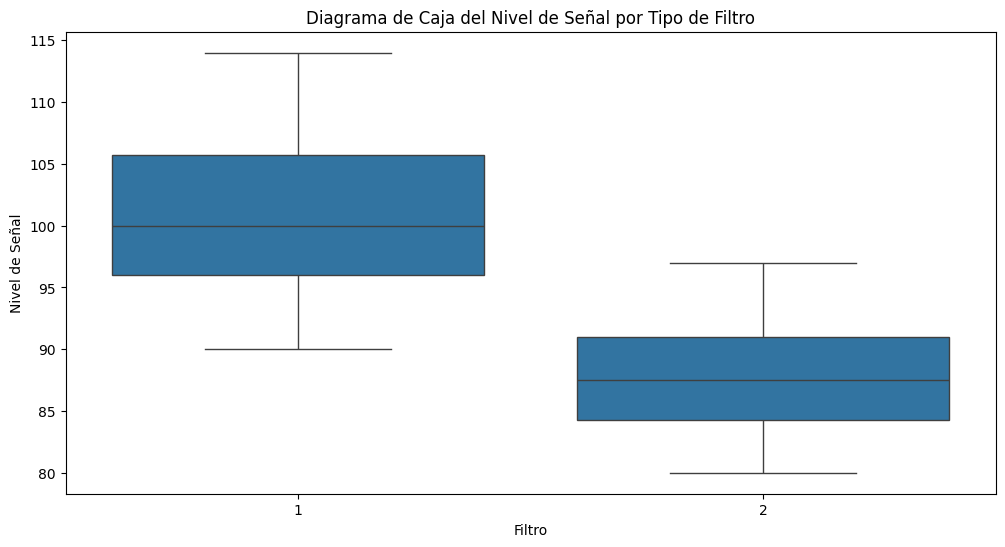

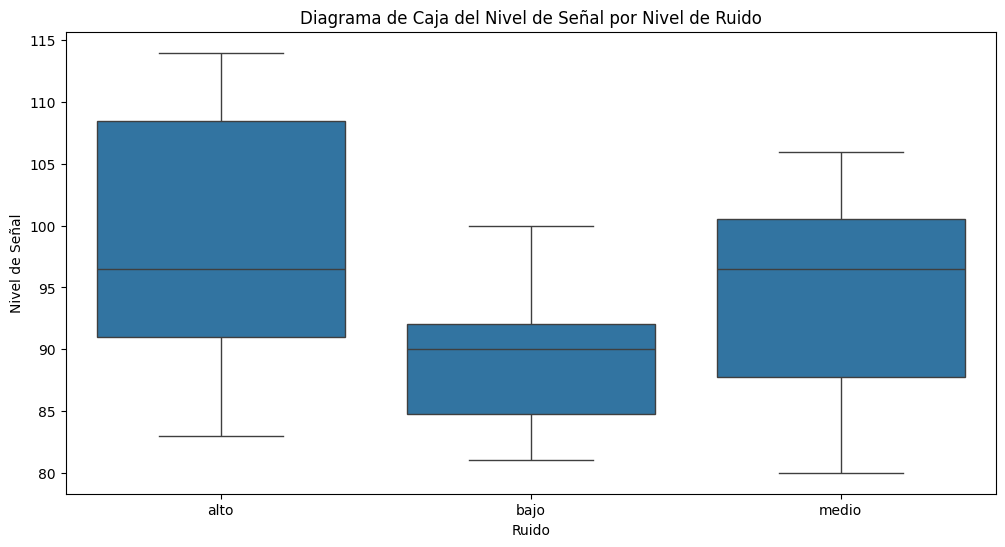

In [ ]:
# Crear el diagrama de caja para el nivel de señal por Filtro
plt.figure(figsize=(12, 6))
sns.boxplot(x='Filtro', y='Nivel_de_senal', data=df)
plt.title('Diagrama de Caja del Nivel de Señal por Tipo de Filtro')
plt.xlabel('Filtro')
plt.ylabel('Nivel de Señal')
plt.show()

# Crear el diagrama de caja para el nivel de señal por Ruido
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ruido', y='Nivel_de_senal', data=df)
plt.title('Diagrama de Caja del Nivel de Señal por Nivel de Ruido')
plt.xlabel('Ruido')
plt.ylabel('Nivel de Señal')
plt.show()

<ipython-input-23-e27cc28a43f9>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n = df.groupby('Ruido').size().min()  # Tamaño mínimo del grupo por nivel de ruido
<ipython-input-23-e27cc28a43f9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Ruido')['Nivel_de_senal'].mean()
<ipython-input-23-e27cc28a43f9>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_err = df.groupby('Ruido')['Nivel_de_se

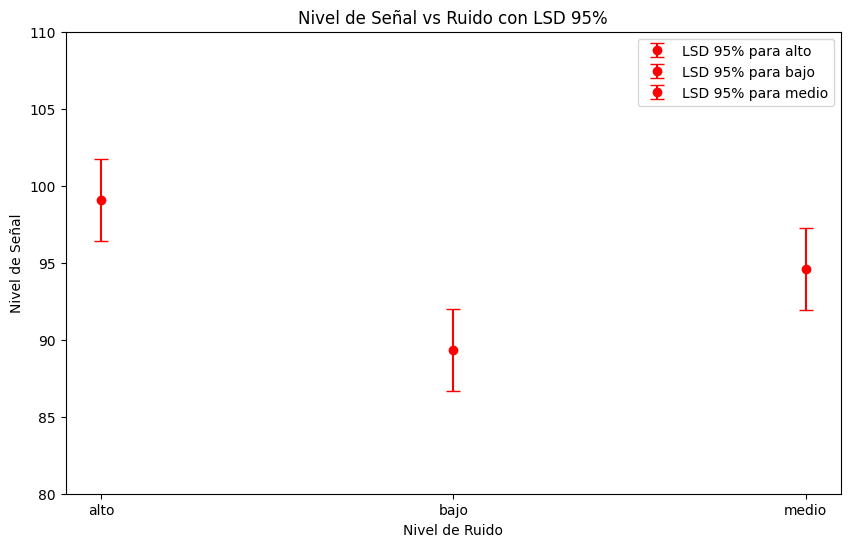

In [ ]:
# Ajustar el modelo ANOVA
model = smf.ols('Nivel_de_senal ~ C(Filtro) * C(Ruido) + C(Momento_del_dia) + C(Operador)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

# Extraer los valores necesarios
sum_sq_error = anova_table.loc['Residual', 'sum_sq']
df_error = anova_table.loc['Residual', 'df']

# Calcular el cuadrático medio del error
mean_sq_error = sum_sq_error / df_error

# Calcular la LSD
alpha = 0.05
n = df.groupby('Ruido').size().min()  # Tamaño mínimo del grupo por nivel de ruido
t_critical = stats.t.ppf(1 - alpha/2, df_error)  # valor crítico de t para el intervalo de confianza

# Calcular la LSD
lsd = t_critical * np.sqrt(2 * mean_sq_error / n)

# Calcular medias y error estándar por nivel de ruido
means = df.groupby('Ruido')['Nivel_de_senal'].mean()
std_err = df.groupby('Ruido')['Nivel_de_senal'].std() / np.sqrt(df.groupby('Ruido').size())

# Crear el gráfico con líneas de LSD
plt.figure(figsize=(10, 6))

# Añadir las medias con intervalos de LSD
for ruido in means.index:
    mean = means[ruido]
    plt.errorbar(ruido, mean, yerr=lsd, fmt='o', color='red', capsize=5, label=f'LSD 95% para {ruido}')

plt.title('Nivel de Señal vs Ruido con LSD 95%')
plt.xlabel('Nivel de Ruido')
plt.ylabel('Nivel de Señal')
plt.ylim(80, 110)  # Ajustar el rango del eje Y
plt.legend()
plt.show()


### Análisis

**1. Filtro (C(Filtro)):**
En ambas tablas ANOVA (Tipo I y Tipo III), el factor Filtro es altamente significativo (p-valor = 0.00000).
Esto indica que el tipo de filtro tiene un impacto considerable en el nivel de señal detectado por el operador.

**2. Ruido (C(Ruido)):**
Al igual que el filtro, el nivel de Ruido es también altamente significativo (p-valor = 0.00000).
Esto implica que las diferencias en la cantidad de ruido de fondo afectan significativamente la capacidad de detección del radar.

**3. Momento del día (C(Momento_del_dia)):**
El Momento del día tiene un p-valor muy alto (0.99336), lo que indica que no tiene un impacto significativo en la variable respuesta.

Conclusión: Este factor no es significativo y podría eliminarse del modelo para simplificarlo, ya que no parece influir en el nivel de señal.

## **3. Sacar conclusiones acerca de los factores que influyen sobre el funcionamiento de los radares.**


- Se deben seleccionar adecuadamente los filtros que se utilizan en la pantalla del radar, ya que esto tiene un impacto directo en la capacidad de detección del radar. Podría ser recomendable investigar cuál filtro es más efectivo y en qué condiciones.


- Un entorno con menor ruido de fondo facilitará la detección de señales en el radar. Las condiciones de operación del radar deben tener en cuenta los niveles de ruido para mejorar la precisión y la detección.

- Las decisiones sobre el tipo de filtro a usar deben tener en cuenta el nivel de ruido de fondo. En situaciones con mayor ruido, ciertos filtros podrían ser más efectivos que otros.

- El momento del día en que se realiza la medición no afecta la efectividad del radar. Por lo tanto, este factor no necesita ser considerado en futuras evaluaciones o ajustes de los radares.

## **4. Con un ruido de fondo bajo, ¿con qué tipo de filtro se detecta antes la señal?**

In [ ]:
# Filtrar los datos para el caso de ruido bajo
ruido_bajo = df[df['Ruido'] == 'bajo']

# Calcular la media del nivel de señal para cada tipo de filtro bajo ruido bajo
mean_signal_ruido_bajo = ruido_bajo.groupby('Filtro')['Nivel_de_senal'].mean()

# Mostrar los resultados
print(mean_signal_ruido_bajo)

Filtro
1    93.333333
2    85.333333
Name: Nivel_de_senal, dtype: float64


<ipython-input-24-f817c727e95f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_signal_ruido_bajo = ruido_bajo.groupby('Filtro')['Nivel_de_senal'].mean()


El Filtro 2 detecta la señal antes, ya que tiene un nivel de señal más bajo (85.33) en comparación con el Filtro 1, que tiene un nivel de señal promedio de 93.33.
Esto indica que el Filtro 2 es más efectivo para detectar señales cuando el ruido de fondo es bajo.

## **5. Gráfico de residuos**

Realizar el gráfico de residuos para comprobar las hipótesis del modelo.

**Gráfico de residuos vs. valores ajustados: Para evaluar la homocedasticidad (igualdad de varianzas).**

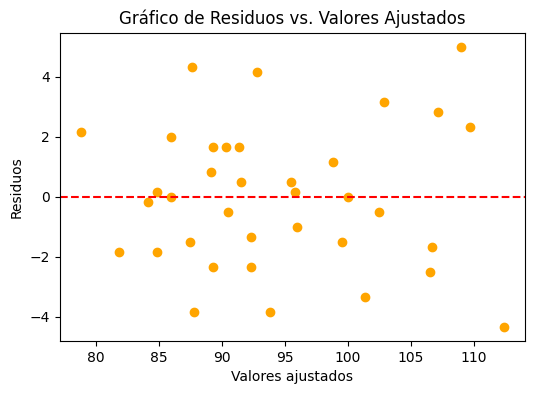

In [ ]:
# Ajustar el modelo ANOVA
model = smf.ols('Nivel_de_senal ~ C(Filtro) * C(Ruido) + C(Momento_del_dia) + C(Operador)', data=df).fit()

# Obtener los residuos y los valores ajustados del modelo
residuos = model.resid
valores_ajustados = model.fittedvalues

# Crear el gráfico de residuos vs. valores ajustados
plt.figure(figsize=(6, 4))
plt.scatter(valores_ajustados, residuos, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.show()


 los puntos se dispersan alrededor de cero, y no hay acumulación en una sola región. Esto también sugiere que el supuesto de homocedasticidad es aceptable

**Histograma de residuos**

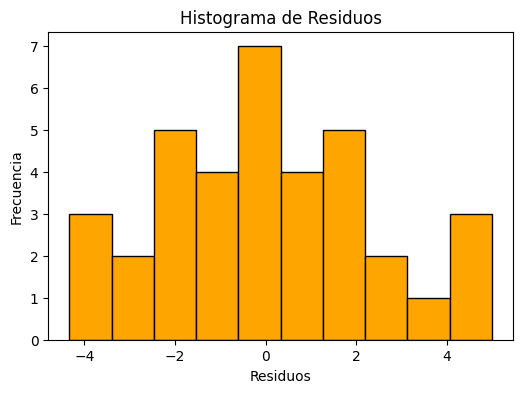

In [ ]:
import matplotlib.pyplot as plt

# Obtener los residuos del modelo (suponiendo que el modelo ya está ajustado)
residuos = model.resid

# Crear el histograma de los residuos
plt.figure(figsize=(6, 4))
plt.hist(residuos, bins=10, edgecolor='black', color='orange')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


los residuos siguen una distribución aproximadamente normal, lo cual valida el uso del ANOVA bajo este supuesto.

# Ahora con R

In [ ]:
# Instalar el paquete rpy2 para ejecutar código en R si no está instalado
!pip install rpy2
# ejecutar celdas en R usando '%%R'

In [ ]:
# Importar la funcionalidad de rpy2
import rpy2.robjects as robjects

# Configurar rpy2 para gráficos
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.ipython import html

In [ ]:
# Importar la funcionalidad de rpy2
import rpy2.robjects as robjects

# Ejecutar código R con rpy2
robjects.r('''
    # Prueba en R: Crear un vector y calcular su media
    valores <- c(1, 2, 3, 4, 5)
    media_valores <- mean(valores)
    print(media_valores)
''')


[1] 3


3.000000


In [ ]:
# Código R para ajustar el modelo ANOVA multifactorial con interacciones
robjects.r('''
    # Crear el dataframe en R similar al de Python
    df <- data.frame(
      Filtro = factor(c(1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1)),
      Ruido = factor(c('bajo', 'medio', 'alto', 'bajo', 'alto', 'medio', 'alto', 'bajo', 'medio', 'alto', 'medio', 'bajo', 'medio', 'medio', 'alto', 'bajo', 'bajo', 'alto',
                      'medio', 'bajo', 'bajo', 'medio', 'alto', 'alto', 'alto', 'alto', 'bajo', 'medio', 'bajo', 'medio', 'bajo', 'alto', 'medio', 'alto', 'medio', 'bajo')),
      Operador = factor(c(1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6)),
      Momento_del_dia = factor(c(1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6)),
      Nivel_de_senal = c(90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84, 102, 90, 95, 92, 85, 104, 87, 84, 100, 96, 110, 91, 93, 112, 92, 80, 90, 98, 86, 91, 97, 98, 100, 92)
    )

    # Ajustar el modelo ANOVA con interacciones (similar al modelo de Python)
    modelo <- aov(Nivel_de_senal ~ Filtro * Ruido + Momento_del_dia + Operador, data = df)

    # Mostrar el resultado del ANOVA (Tipo I, por defecto en R)
    print(summary(modelo))

    # Para obtener sumas de cuadrados Tipo III en R, se requiere el paquete car
    if (!requireNamespace("car", quietly = TRUE)) {
      install.packages("car")
    }

    library(car)
    # Realizar ANOVA con sumas de cuadrados Tipo III
    modelo_tipo_3 <- Anova(modelo, type = 3)

    # Mostrar la tabla ANOVA con sumas de cuadrados Tipo III
    print(modelo_tipo_3)
''')


                Df Sum Sq Mean Sq F value   Pr(>F)    
Filtro           1 1469.4  1469.4 148.429 1.04e-10 ***
Ruido            2  571.5   285.8  28.864 1.27e-06 ***
Momento_del_dia  5    4.3     0.9   0.088 0.993365    
Operador         5  428.0    85.6   8.646 0.000171 ***
Filtro:Ruido     2  126.7    63.4   6.400 0.007104 ** 
Residuals       20  198.0     9.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


(as ‘lib’ is unspecified)




















































































	‘/tmp/RtmpFokf8i/downloaded_packages’




Anova Table (Type III tests)

Response: Nivel_de_senal
                 Sum Sq Df   F value    Pr(>F)    
(Intercept)     26325.1  1 2659.0972 < 2.2e-16 ***
Filtro            884.1  1   89.3013 8.121e-09 ***
Ruido             618.1  2   31.2177 7.066e-07 ***
Momento_del_dia     4.3  5    0.0875  0.993365    
Operador          428.0  5    8.6465  0.000171 ***
Filtro:Ruido      126.7  2    6.4001  0.007104 ** 
Residuals         198.0 20                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Sum Sq,Df,F value,Pr(>F)
...,...,...,...


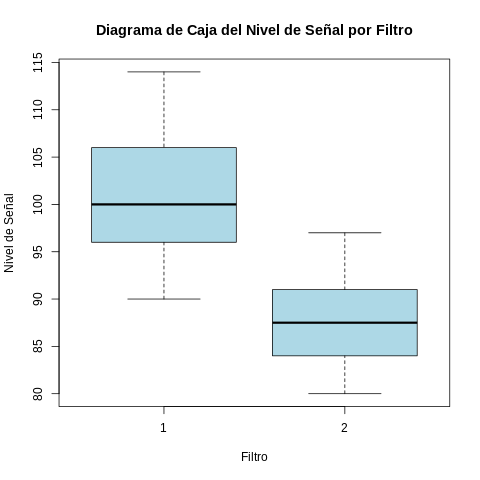

In [ ]:
# Cargar librerías necesarias para gráficos en R
grdevices = importr('grDevices')

# Definir el bloque R que generará y mostrará el gráfico
robjects.r('''
    # Crear datos de ejemplo
    df <- data.frame(
      Filtro = factor(c(1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1)),
      Ruido = factor(c('bajo', 'medio', 'alto', 'bajo', 'alto', 'medio', 'alto', 'bajo', 'medio', 'alto', 'medio', 'bajo', 'medio', 'medio', 'alto', 'bajo', 'bajo', 'alto',
                      'medio', 'bajo', 'bajo', 'medio', 'alto', 'alto', 'alto', 'alto', 'bajo', 'medio', 'bajo', 'medio', 'bajo', 'alto', 'medio', 'alto', 'medio', 'bajo')),
      Nivel_de_senal = c(90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84, 102, 90, 95, 92, 85, 104, 87, 84, 100, 96, 110, 91, 93, 112, 92, 80, 90, 98, 86, 91, 97, 98, 100, 92)
    )

    # Crear un archivo temporal para el gráfico de caja por Filtro
    png(filename="boxplot_filtro.png")

    # Crear un diagrama de caja para Filtro
    boxplot(Nivel_de_senal ~ Filtro, data = df, main = "Diagrama de Caja del Nivel de Señal por Filtro",
            xlab = "Filtro", ylab = "Nivel de Señal", col = "lightblue", border = "black")

    # Guardar el gráfico
    dev.off()

    # Crear un archivo temporal para el gráfico de caja por Ruido
    png(filename="boxplot_ruido.png")

    # Crear un diagrama de caja para Ruido
    boxplot(Nivel_de_senal ~ Ruido, data = df, main = "Diagrama de Caja del Nivel de Señal por Ruido",
            xlab = "Ruido", ylab = "Nivel de Señal", col = "orange", border = "black")

    # Guardar el gráfico
    dev.off()
''')

# Mostrar el gráfico del diagrama de caja por Filtro
Image("boxplot_filtro.png")


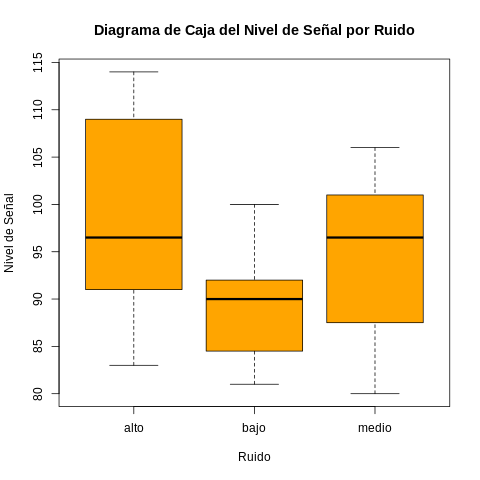

In [ ]:
# Mostrar el gráfico del diagrama de caja por Ruido
Image("boxplot_ruido.png")


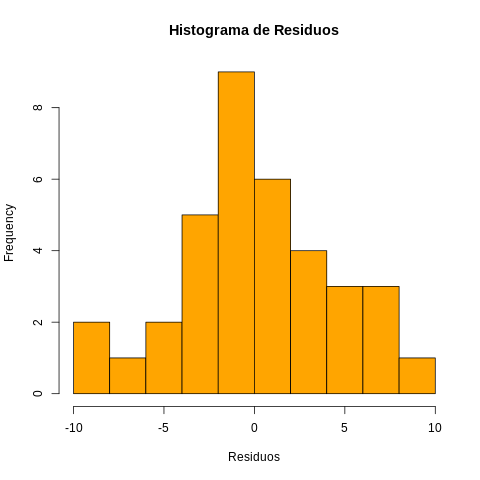

In [ ]:
# Cargar librerías necesarias para gráficos en R
grdevices = importr('grDevices')

# Definir el bloque R que generará y mostrará el gráfico
robjects.r('''
    # Crear datos de ejemplo
    df <- data.frame(
      Filtro = factor(c(1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1)),
      Ruido = factor(c('bajo', 'medio', 'alto', 'bajo', 'alto', 'medio', 'alto', 'bajo', 'medio', 'alto', 'medio', 'bajo', 'medio', 'medio', 'alto', 'bajo', 'bajo', 'alto',
                      'medio', 'bajo', 'bajo', 'medio', 'alto', 'alto', 'alto', 'alto', 'bajo', 'medio', 'bajo', 'medio', 'bajo', 'alto', 'medio', 'alto', 'medio', 'bajo')),
      Nivel_de_senal = c(90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84, 102, 90, 95, 92, 85, 104, 87, 84, 100, 96, 110, 91, 93, 112, 92, 80, 90, 98, 86, 91, 97, 98, 100, 92)
    )

    # Ajustar un modelo ANOVA en R
    modelo <- aov(Nivel_de_senal ~ Filtro * Ruido, data = df)

    # Obtener los residuos
    residuos <- residuals(modelo)

    # Crear un archivo temporal para el gráfico
    png(filename="hist_residuos.png")

    # Crear un histograma de residuos
    hist(residuos, breaks = 10, main = "Histograma de Residuos", xlab = "Residuos", col = "orange", border = "black")

    # Guardar el gráfico
    dev.off()
''')

# Mostrar el gráfico generado en Colab
from IPython.display import Image
Image("hist_residuos.png")

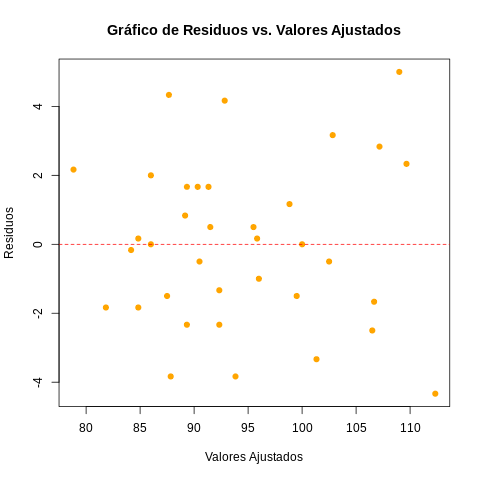

In [ ]:
# Cargar librerías necesarias para gráficos en R
grdevices = importr('grDevices')

# Definir el bloque R que generará y mostrará el gráfico
robjects.r('''
    # Crear datos de ejemplo
    df <- data.frame(
      Filtro = factor(c(1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1)),
      Ruido = factor(c('bajo', 'medio', 'alto', 'bajo', 'alto', 'medio', 'alto', 'bajo', 'medio', 'alto', 'medio', 'bajo', 'medio', 'medio', 'alto', 'bajo', 'bajo', 'alto',
                      'medio', 'bajo', 'bajo', 'medio', 'alto', 'alto', 'alto', 'alto', 'bajo', 'medio', 'bajo', 'medio', 'bajo', 'alto', 'medio', 'alto', 'medio', 'bajo')),
      Operador = factor(c(1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6)),
      Momento_del_dia = factor(c(1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6)),
      Nivel_de_senal = c(90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84, 102, 90, 95, 92, 85, 104, 87, 84, 100, 96, 110, 91, 93, 112, 92, 80, 90, 98, 86, 91, 97, 98, 100, 92)
    )

    # Ajustar el modelo ANOVA en R
    modelo <- aov(Nivel_de_senal ~ Filtro * Ruido + Momento_del_dia + Operador, data = df)

    # Obtener los residuos y los valores ajustados
    residuos <- residuals(modelo)
    valores_ajustados <- fitted(modelo)

    # Crear un archivo temporal para el gráfico
    png(filename="residuos_vs_ajustados.png")

    # Crear el gráfico de residuos vs. valores ajustados
    plot(valores_ajustados, residuos,
         main = "Gráfico de Residuos vs. Valores Ajustados",
         xlab = "Valores Ajustados", ylab = "Residuos",
         col = "orange", pch = 19)
    abline(h = 0, col = "red", lty = 2)

    # Guardar el gráfico
    dev.off()
''')

# Mostrar el gráfico generado en Colab
Image("residuos_vs_ajustados.png")
